#### PROBLEM IDENTIFICATION
##### SMART 

- Specific: To optimize services based on the needs of specific customer age groups in order to reduce churn rate.
- Measurable: By improving services to customers within certain demographics, it is expected to reduce the churn rate by up to 50%.
- Achievable: By identifying customer demographics for service optimization, it is feasible to reduce the churn rate by up to 50%.
- Relevant: Identifying demographics for service improvement is crucial for maintaining customer relations.
- Time-bound: Service optimization will be carried out over the next 5 months, with the expectation that the churn rate will gradually decrease.

SMART: Identifying credit card customer demographics to optimize services to reduce churn rate by 50% and maintain relationships with customers, with optimization efforts lasting for the next 5 months.

Problem Elaboration:

1. What is the general demographic profile of customers?
2. What is the income distribution of customers and how does customer demographics relate to income?
3. Do customers with certain characteristics tend to make larger or more frequent transactions, and how does this relate to their credit limits?
4. Is there a correlation between customer demographics and churn rate?
5. What is the distribution of churn rates among all customers?
6. Are there significant differences in churn rates between card types?




#### DATA LOADING

In [23]:
### Dilakukan data loading dengan membaca file csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy import stats
from scipy.stats import f_oneway


## Membaca 
df= pd.read_csv(r'C:\Users\User\github-classroom\FTDS-assignment-bay\p0-ftds029-rmt-m1-gedealdi28\BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


The dataframe above contains 10127 rows and 23 columns, with the following column descriptions:

- CLIENTNUM ==>Unique identifier for each customer. (Integer)
- Attrition_Flag ==>Flag indicating whether or not the customer has churned out. (Boolean)
- Customer_Age ==>Age of customer. (Integer)
- Gender ==>Gender of customer. (String)
- Dependent_count ==>Number of dependents that customer has. (Integer)
- Education_Level ==>Education level of customer. (String)
- Marital_Status ==>Marital status of customer. (String)
- Income_Category ==>Income category of customer. (String)
- Card_Category ==>Type of card held by customer. (String)
- Months_on_book ==>How long customer has been on the books. (Integer)
- Total_Relationship_Count ==>Total number of relationships customer has with the credit card provider. (Integer)
- Months_Inactive_12_mon ==>Number of months customer has been inactive in the last twelve months. (Integer)
- Contacts_Count_12_mon ==>Number of contacts customer has had in the last twelve months. (Integer)
- Credit_Limit ==>Credit limit of customer. (Integer)
- Total_Revolving_Bal ==>Total revolving balance of customer. (Integer)
- Avg_Open_To_Buy ==>Average open to buy ratio of customer. (Integer)
- Total_Amt_Chng_Q4_Q1 ==>Total amount changed from quarter 4 to quarter 1. (Integer)
- Total_Trans_Amt ==>Total transaction amount. (Integer)
- Total_Trans_Ct ==>Total transaction count. (Integer)
- Total_Ct_Chng_Q4_Q1 ==>Total count changed from quarter 4 to quarter 1. (Integer)
- Avg_Utilization_Ratio ==>Average utilization ratio of customer. (Integer)
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 ==>
- Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

After inspecting the info, we can see that there are no missing data in our dataframe, so we proceed by checking if there are any duplicate data.

In [3]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool


It appears that there are no duplicated data, so the data exploration phase is complete, and we can proceed with data cleaning.

#### DATA CLEANING

In [4]:
### MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN
df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',inplace=True)
df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',inplace=True)
df.drop(columns='Avg_Utilization_Ratio',inplace=True)
df.drop(columns='Total_Ct_Chng_Q4_Q1',inplace=True)
df.drop(columns='Total_Amt_Chng_Q4_Q1',inplace=True)
df.drop(columns='Contacts_Count_12_mon',inplace=True)



df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,11914.0,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,7392.0,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,3418.0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,796.0,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,4716.0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,4003.0,1851,2152.0,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,4277.0,2186,2091.0,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,5409.0,0,5409.0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,5281.0,0,5281.0,8395,62


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op


Data cleaning will involve removing 4 columns that are not used to address the elaborated problem. Once the data is cleaned, we will proceed to the analysis phase.

### DATA ANALYSIS

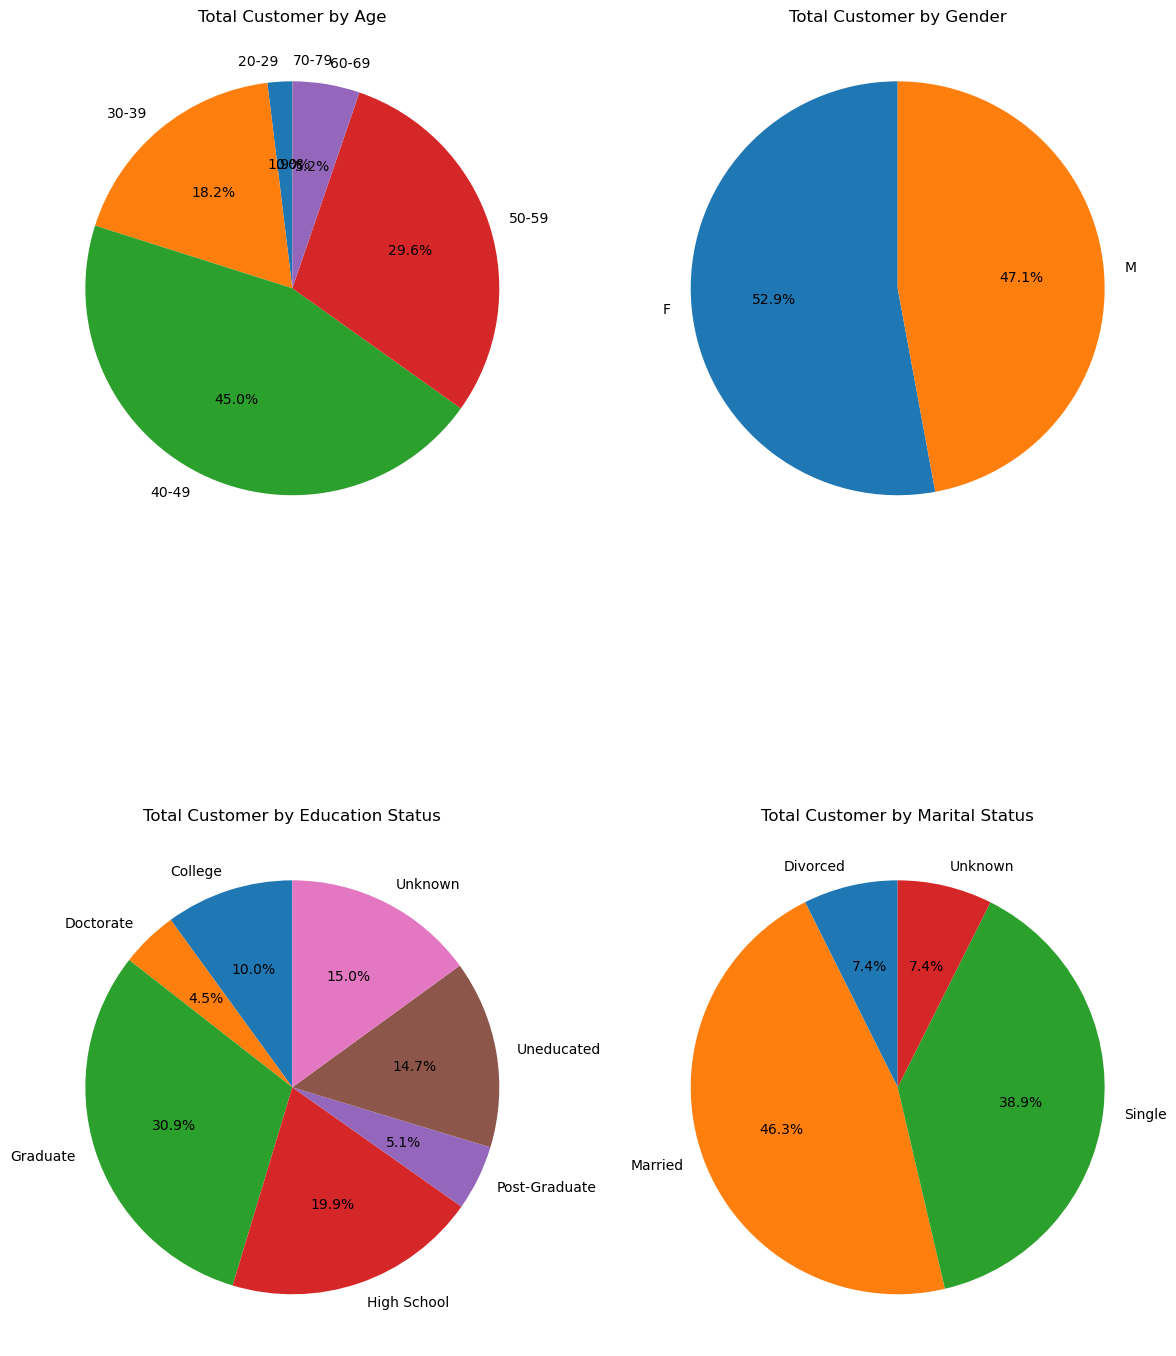

In [6]:
###  Data Visualization for first problem  
'''Elaboration 1 involves answering by creating a pie chart showing the percentage distribution of
 age groups, gender, level of education, and marital status as an overview of the customer demographic.
'''  
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=range(20, 90, 10), labels=[f'{i}-{i+9}' for i in range(20, 80, 10)], right=False)
## Gambaran Umum customer dari Umur, Gender, Education dan Marital Status
total_by_age = df.groupby('Age_Group').size().reset_index(name='AgeGroup_Count')
total_by_gender=df.groupby('Gender').size().reset_index(name='TotalGender')
total_by_education=df.groupby('Education_Level').size().reset_index(name='TotalEducation')
total_by_marital=df.groupby('Marital_Status').size().reset_index(name='TotalMarital')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 18))
## Barplot
axes[0,0].pie(total_by_age['AgeGroup_Count'],labels= total_by_age['Age_Group'],autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Total Customer by Age')

axes[0,1].pie(total_by_gender['TotalGender'],labels= total_by_gender['Gender'],autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Total Customer by Gender')

axes[1,0].pie(total_by_education['TotalEducation'],labels= total_by_education['Education_Level'],autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Total Customer by Education Status')

axes[1,1].pie(total_by_marital['TotalMarital'],labels= total_by_marital['Marital_Status'],autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Total Customer by Marital Status')



plt.tight_layout()
plt.show()

The distribution of credit card customers varies significantly. In terms of age groups, customers are predominantly aged 40-49 years, accounting for 45% of the total, followed by the 50-59 age group with 29.6%, then the 30-39 age group with 18.2%. This is followed by the 60-69 age group, the 20-29 age group, and lastly the 70-79 age group. Regarding gender, females dominate ownership with 52.9% of credit card holders.

Examining education levels, the majority of credit card users are bachelor's degree graduates, comprising 30.9%, followed by those with a high school education at 19.9%, then those without formal education at 14.7%. Following are college students at 10%, doctoral degree holders at 4.5%, and 15% with unknown education levels. Lastly, regarding marital status, 46.3% of customers are married, 38.9% are single, 7.4% are divorced, and the remaining 7.4% have unknown marital statuses.

From this, we can conclude that credit card customers are typically aged between 30 and 59, predominantly female, and mostly bachelor's degree holders. Additionally, the majority are married, which is reasonable considering that this age range is typically associated with higher spending due to being in their productive years. Moreover, higher education levels often correlate with higher spending, especially among married individuals.

Therefore, the pie chart created can depict the demographic overview effectively.

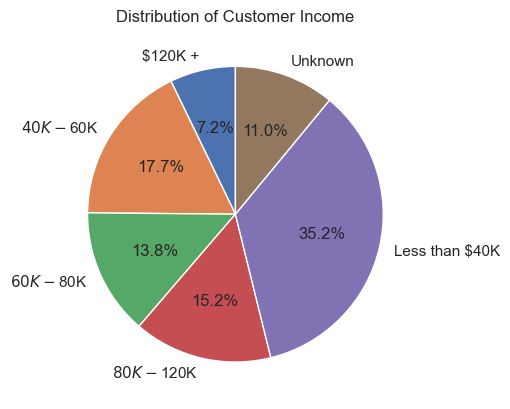

In [16]:
## Visualisasi data untuk penjabaran masalah kedua
'''Elaboration 2 is addressed by creating an income distribution
and then constructing a bar plot to visualize the demographic distribution based on their income.
'''
#Bagaimana persebaran income dari Customer
import seaborn as sns
sns.set(style="whitegrid")

penghasilan = df.groupby('Income_Category').size().reset_index(name='Income_size')

plt.pie(penghasilan['Income_size'],labels= penghasilan['Income_Category'],autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Income')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10784\1070482410.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_10784\1070482410.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_10784\1070482410.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_10784\1070482410.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')


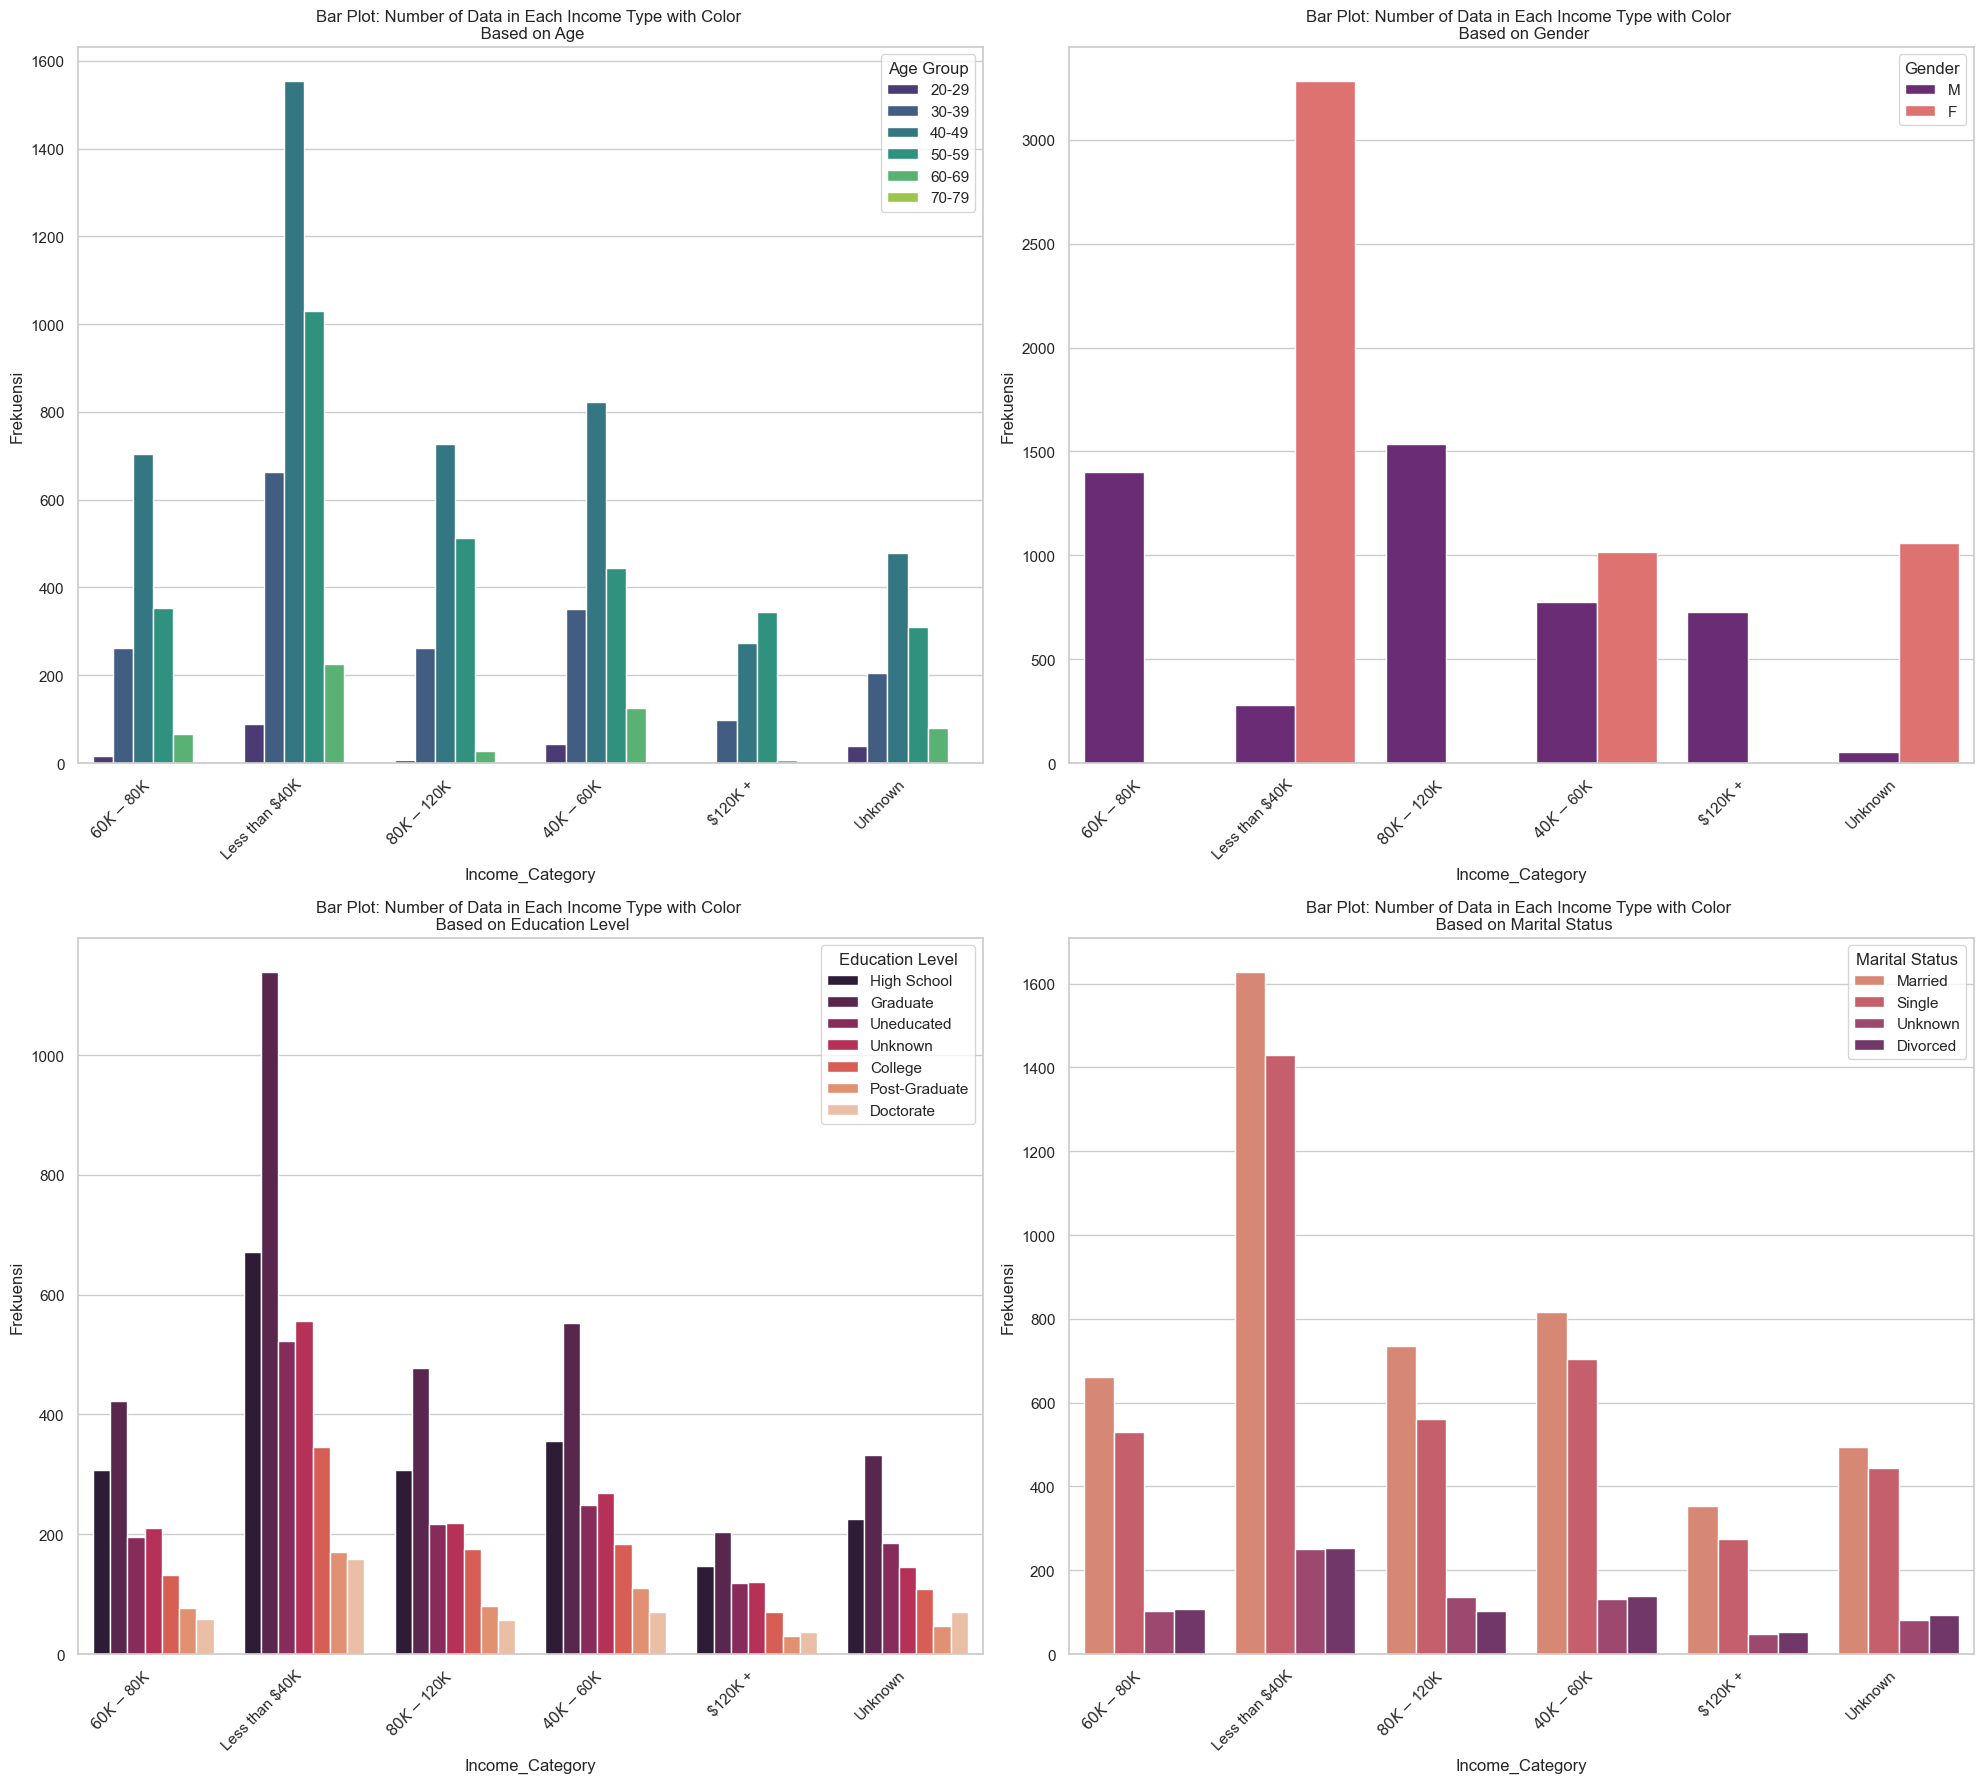

In [17]:
# Seperti apakah demografi pelanggan berdasar dari jenis incomenya 
'''Penjabaran 2 yaitu Apa demografi dari Customer berdasarkan jenis incomenya dijawab dengan membuat
barchart jumlah kelompok demografi terhadap jumlah pendapatannya
'''  

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

# Bar Plot 1: Customer Age
sns.countplot(x='Income_Category', data=df, hue='Age_Group', palette='viridis', dodge=True, ax=axes[0,0])
axes[0,0].set_title('Bar Plot: Number of Data in Each Income Type with Color \n Based on Age')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].legend(title='Age Group', bbox_to_anchor=(1, 1))
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')

# Bar Plot 2: Gender
sns.countplot(x='Income_Category', data=df, hue='Gender', palette='magma', dodge=True, ax=axes[0,1])
axes[0,1].set_title('Bar Plot: Number of Data in Each Income Type with Color \n Based on Gender')
axes[0,1].set_ylabel('Frekuensi')
axes[0,1].legend(title='Gender', bbox_to_anchor=(1, 1))
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')

# Bar Plot 3: Education Level
sns.countplot(x='Income_Category', data=df, hue='Education_Level', palette='rocket', dodge=True, ax=axes[1,0])
axes[1,0].set_title('Bar Plot: Number of Data in Each Income Type with Color \n Based on Education Level')
axes[1,0].set_ylabel('Frekuensi')
axes[1,0].legend(title='Education Level', bbox_to_anchor=(1, 1))
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')

# Bar Plot 3: Marital
sns.countplot(x='Income_Category', data=df, hue='Marital_Status', palette='flare', dodge=True, ax=axes[1,1])
axes[1,1].set_title('Bar Plot: Number of Data in Each Income Type with Color \n Based on Marital Status')
axes[1,1].set_ylabel('Frekuensi')
axes[1,1].legend(title='Marital Status', bbox_to_anchor=(1, 1))
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


Thirty-five percent of credit card customers have an income of less than $40,000, making it the most common income bracket. The second most common income range for customers is between $80,000 and $120,000. When we looking at the bar plot, it's evident that the $60,000 to $80,000 income bracket is dominated by customers aged 30 to 39. Similarly, each income category is predominantly occupied by customers aged 30 to 39, except for the $30,000 to $39,000 bracket, where the 50 to 59 and 40 to 49 age groups also dominate. The distribution of income across the 20 to 29 and 60 to 79 age groups appears even, but due to the smaller number of customers in these age groups, it's not as pronounced in the bar plot.

From the first graph, we can conclude that the distribution of customer income is relatively even across age groups. In the second graph, it's evident that females dominate in the income bracket of less than $40,000, with over 3000 females in this category. For the $40,000 to $60,000 income bracket, females still dominate but are closely followed by males, with the remainder being predominantly male. This suggests that although females are more prevalent credit card users, on average they have incomes ranging from less than $40,000 to $60,000.

Examining income by education level, it's noticeable that bachelor's degree holders dominate the income bracket of less than $40,000, followed by customers with a high school education. Income above $120,000 is also predominantly held by bachelor's degree holders. This is concerning as many bachelor's degree holders have credit cards but have incomes below $40,000. From the last graph, it's apparent that many credit card customers are married.

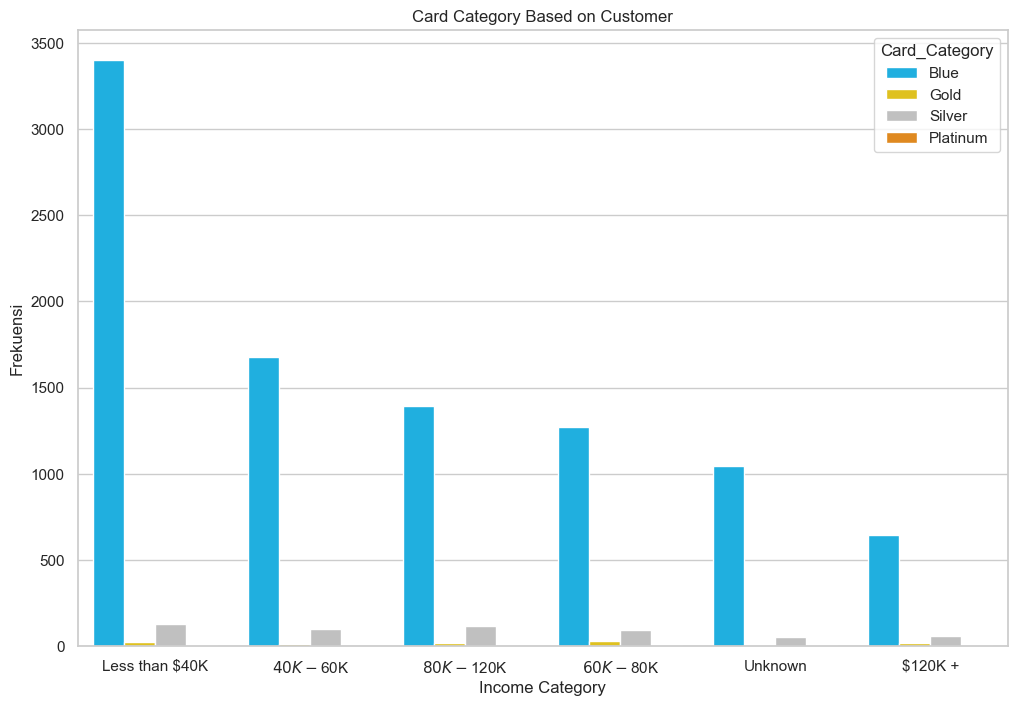

In [18]:
##How About Customer by Card (?)

plt.figure(figsize=(12, 8))
card_palette = {'Silver': 'silver', 'Gold': 'gold', 'Platinum': 'darkorange', 'Blue': 'deepskyblue'}
sns.countplot(x='Income_Category', hue='Card_Category', data=df, order=df['Income_Category'].value_counts().index,palette=card_palette)
plt.title('Card Category Based on Customer')
plt.xlabel('Income Category')
plt.ylabel('Frekuensi')
plt.show()



When examining credit card categories based on customer income, it appears that regardless of income level, customers predominantly hold blue or the lowest level credit cards. Following that, on average, customers hold silver level credit cards.

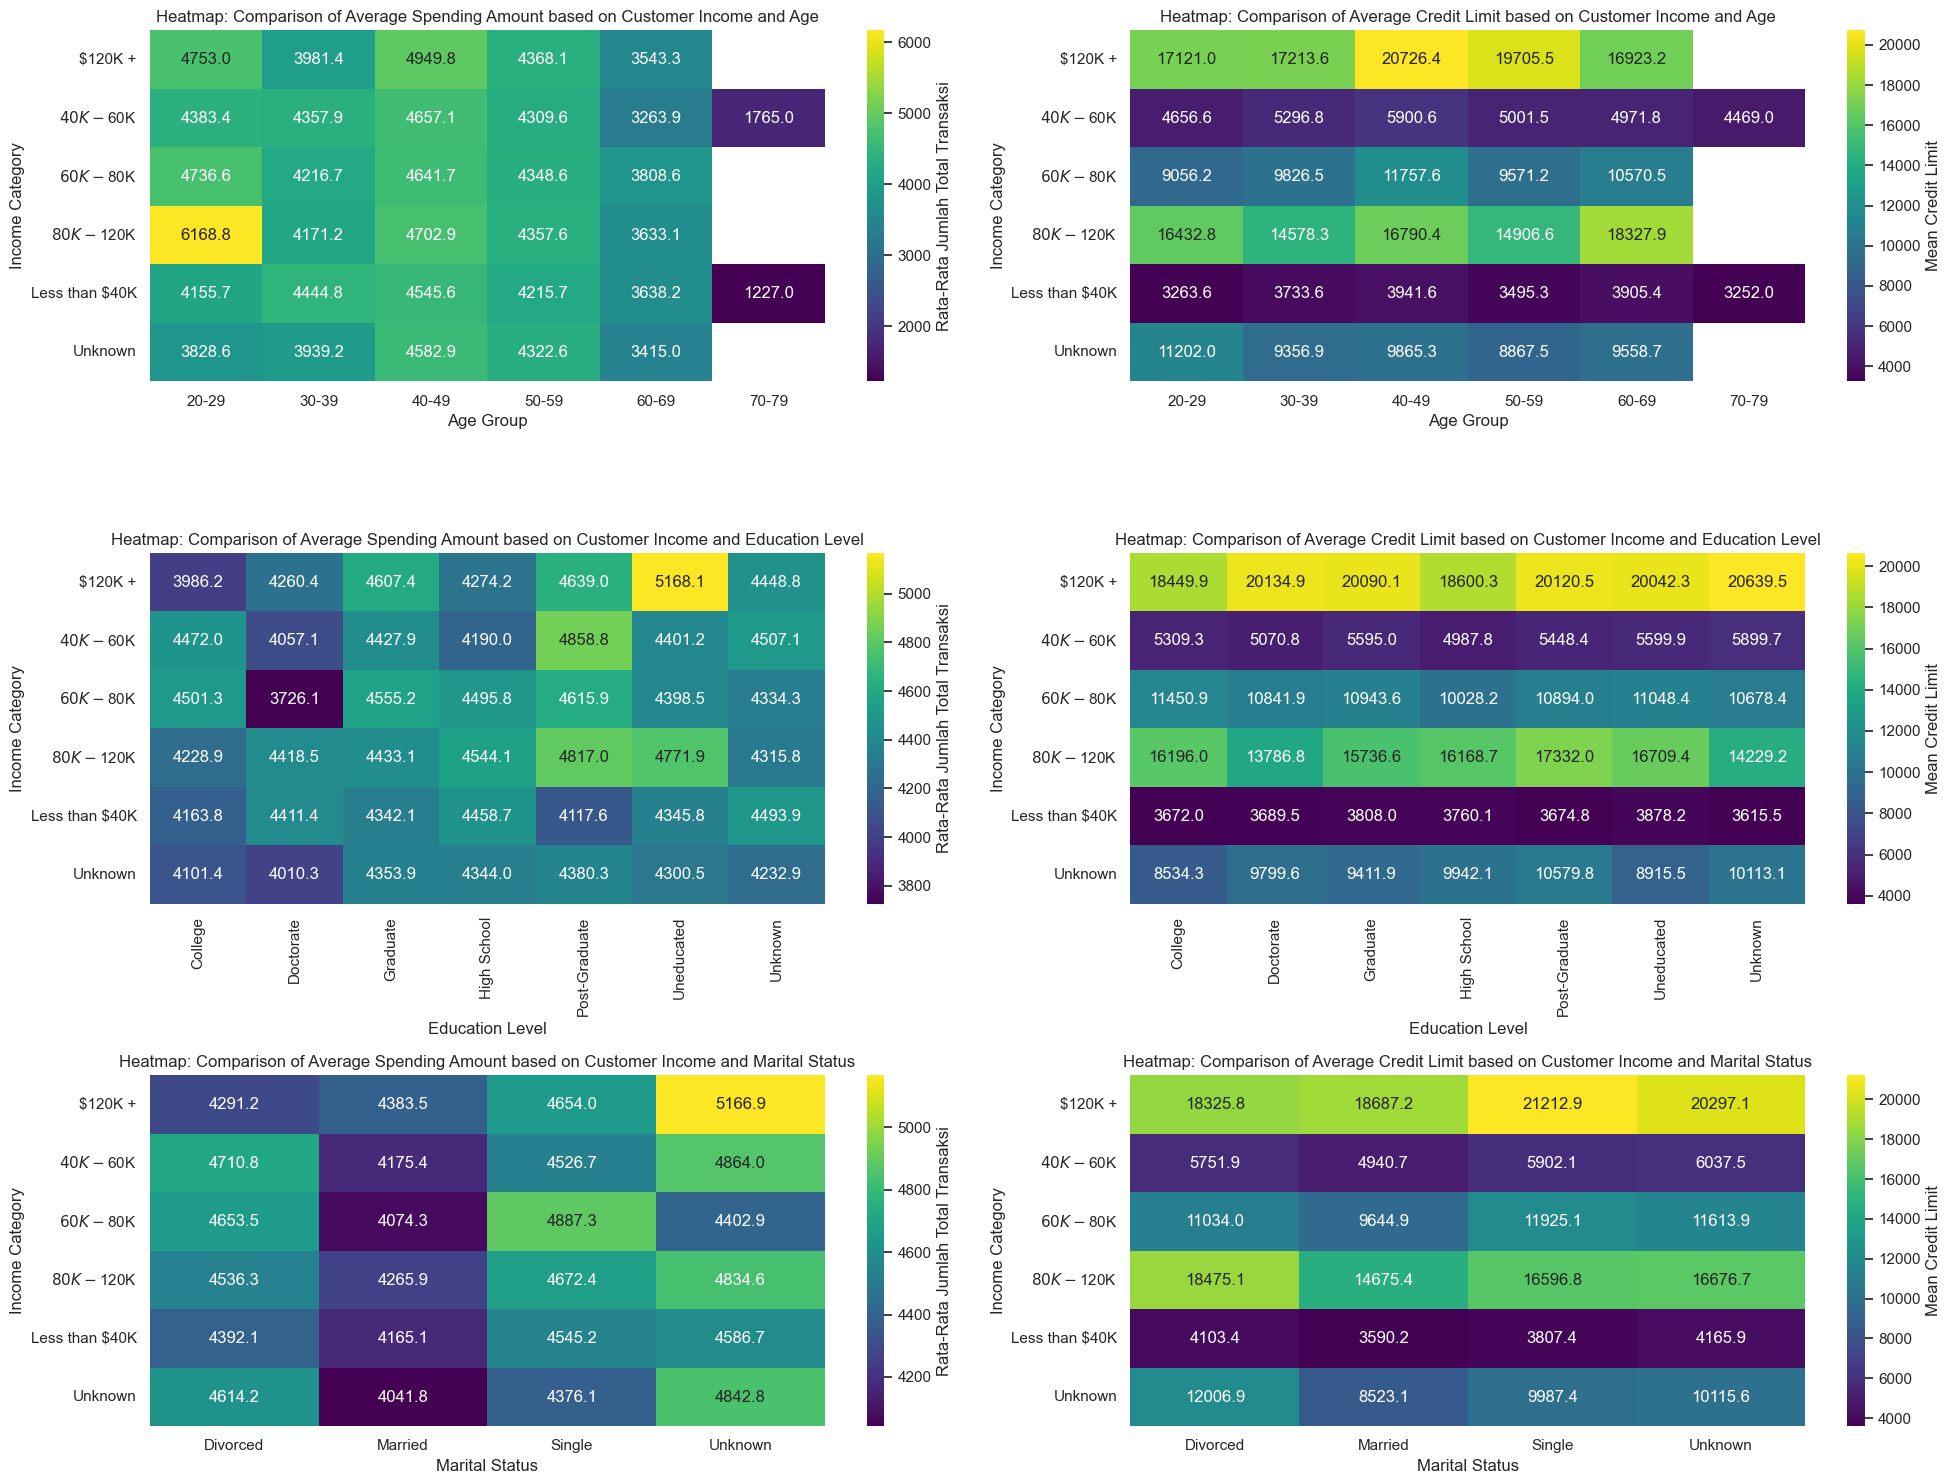

In [19]:
###### Apakah terdapat korelasi antara demografis pelanggan dengan tingkat churn


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

pivot_table = df.pivot_table(index='Income_Category', columns='Age_Group', values='Total_Trans_Amt', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Rata-Rata Jumlah Total Transaksi'},ax=axes[0,0])
axes[0,0].set_title('Heatmap: Comparison of Average Spending Amount based on Customer Income and Age')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Income Category')


pivot_table1 = df.pivot_table(index='Income_Category', columns='Age_Group', values='Credit_Limit', aggfunc='mean')
sns.heatmap(pivot_table1, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Mean Credit Limit'},ax=axes[0,1])
axes[0,1].set_title('Heatmap: Comparison of Average Credit Limit based on Customer Income and Age')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Income Category')

pivot_table = df.pivot_table(index='Income_Category', columns='Education_Level', values='Total_Trans_Amt', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Rata-Rata Jumlah Total Transaksi'},ax=axes[1,0])
axes[1,0].set_title('Heatmap: Comparison of Average Spending Amount based on Customer Income and Education Level')
axes[1,0].set_xlabel('Education Level')
axes[1,0].set_ylabel('Income Category')


pivot_table1 = df.pivot_table(index='Income_Category', columns='Education_Level', values='Credit_Limit', aggfunc='mean')
sns.heatmap(pivot_table1, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Mean Credit Limit'},ax=axes[1,1])
axes[1,1].set_title('Heatmap: Comparison of Average Credit Limit based on Customer Income and Education Level')
axes[1,1].set_xlabel('Education Level')
axes[1,1].set_ylabel('Income Category')

pivot_table = df.pivot_table(index='Income_Category', columns='Marital_Status', values='Total_Trans_Amt', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Rata-Rata Jumlah Total Transaksi'},ax=axes[2,0])
axes[2,0].set_title('Heatmap: Comparison of Average Spending Amount based on Customer Income and Marital Status')
axes[2,0].set_xlabel('Marital Status')
axes[2,0].set_ylabel('Income Category')


pivot_table1 = df.pivot_table(index='Income_Category', columns='Marital_Status', values='Credit_Limit', aggfunc='mean')
sns.heatmap(pivot_table1, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Mean Credit Limit'},ax=axes[2,1])
axes[2,1].set_title('Heatmap: Comparison of Average Credit Limit based on Customer Income and Marital Status')
axes[2,1].set_xlabel('Marital Status')
axes[2,1].set_ylabel('Income Category')

plt.tight_layout()
plt.show()


Let's take a look at the heat map where we observe the average number of transactions and credit limits based on age and income categories. For the average number of transactions, it's notable that the 20 to 29 age group with incomes ranging from $80,000 to $120,000 conducts the highest average number of transactions, around 6000 transactions per period. Additionally, among the dominant age group, which is 30 to 59, it's evident that the 40 to 49 age group conducts the most transactions, while other age groups conduct transactions within a normal range. For the 60 to 79 age group, transactions are relatively lower, suggesting this group may be nearing the end of their credit card subscription.

Regarding credit limits, it's generally observed that higher incomes correspond to higher credit limits. However, the heatmap shows that customers aged 40 to 49 with incomes below $40,000 have a credit limit of only $3000 but engage in numerous transactions.

Regarding education levels, customers with no formal education but incomes above $120,000 conduct the most transactions, which is reasonable. Conversely, the least active groups in terms of transactions are doctoral degree holders and students, which may be due to their busy schedules. There's no extreme observation regarding credit limits based on education level.

Examining transactions based on marital status, married individuals across various income categories tend to conduct fewer transactions compared to other groups. This could be a sign that this group may be considering discontinuing their credit card subscriptions, thus requiring more optimal services to retain them.

In conclusion, the age group to watch out for and optimize services for are individuals aged 60 to 79. For education level, attention should be given to serving customers who are still pursuing bachelor's and doctoral degrees. Regarding marital status, efforts should focus on optimizing services for married individuals to retain their subscriptions.

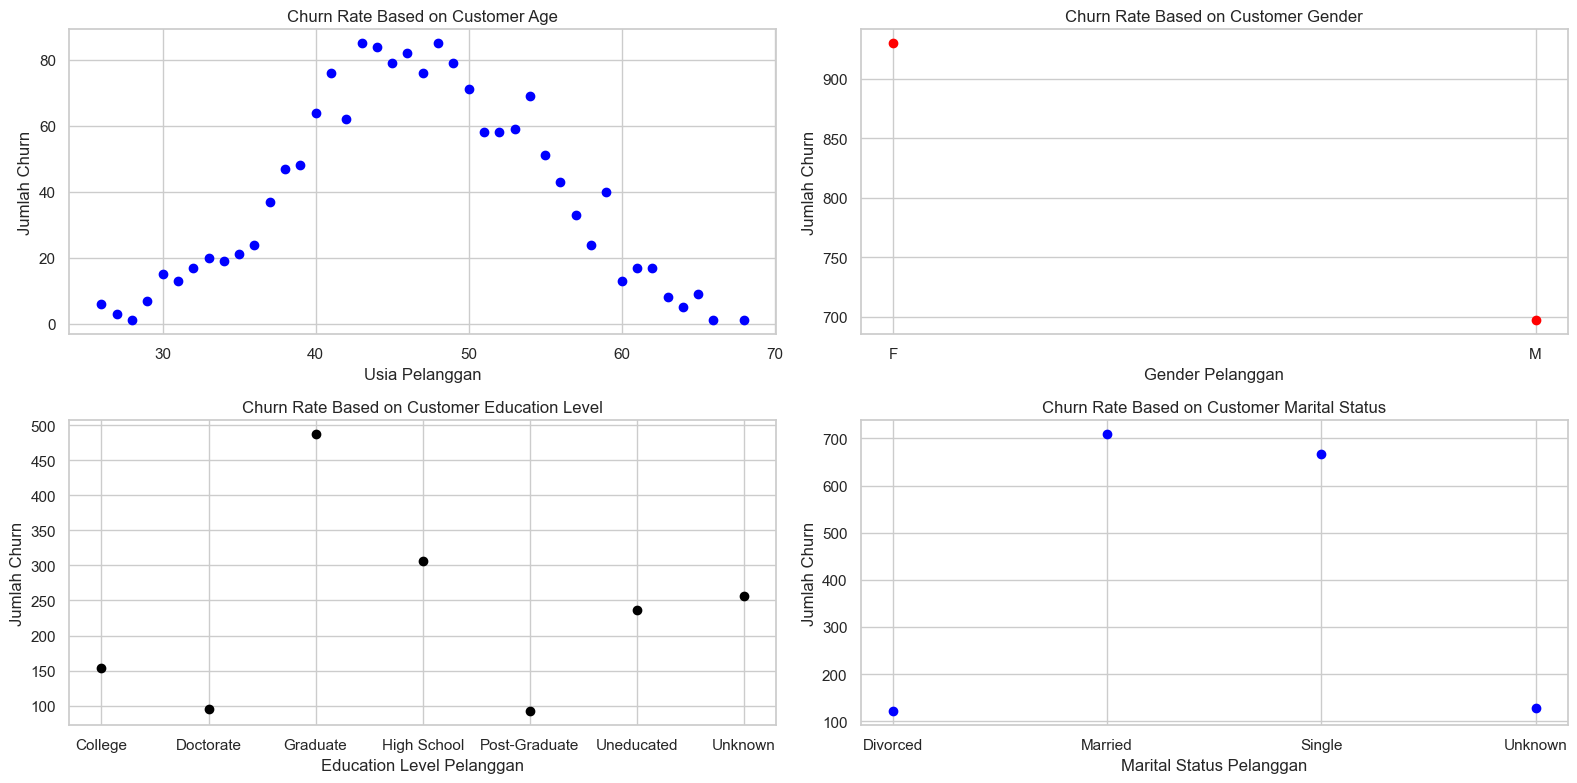

In [20]:
## Bagaimana Visualisasi Tingkat Churn Berdasarkan Demografis

##Churned Age
churned = df[df['Attrition_Flag']=='Attrited Customer']
churned_age = churned.groupby('Customer_Age').size().reset_index(name='ChurnedAge_Count')
total_by_age = df.groupby('Customer_Age').size().reset_index(name='TotalAge_Count')
churned_age =pd.merge(total_by_age,churned_age, on='Customer_Age',how = 'left')
churned_age['Churn_Rate'] = (churned_age['ChurnedAge_Count'] / churned_age['TotalAge_Count']) * 100
##Churned Gender
churned = df[df['Attrition_Flag']=='Attrited Customer']
churned_gender = churned.groupby('Gender').size().reset_index(name='ChurnedGender_Count')
churned_gender =pd.merge(total_by_gender,churned_gender, on='Gender',how = 'left')
churned_gender['Churn_Rate'] = (churned_gender['ChurnedGender_Count'] / churned_gender['TotalGender']) * 100
##Churned Education Level
churned = df[df['Attrition_Flag']=='Attrited Customer']
churned_education = churned.groupby('Education_Level').size().reset_index(name='ChurnedEducation_Count')
churned_education =pd.merge(total_by_education,churned_education, on='Education_Level',how = 'left')
churned_education['Churn_Rate'] = (churned_education['ChurnedEducation_Count'] / churned_education['TotalEducation']) * 100
##Churned Marital Status
churned = df[df['Attrition_Flag']=='Attrited Customer']
churned_marital = churned.groupby('Marital_Status').size().reset_index(name='ChurnedMarital_Count')
churned_marital =pd.merge(total_by_marital,churned_marital, on='Marital_Status',how = 'left')
churned_marital['Churn_Rate'] = (churned_marital['ChurnedMarital_Count'] / churned_marital['TotalMarital']) * 100


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

axes[0,0].scatter(total_by_age['Customer_Age'], churned_age['ChurnedAge_Count'], color='blue')
axes[0,0].set_title('Churn Rate Based on Customer Age')
axes[0,0].set_xlabel('Usia Pelanggan')
axes[0,0].set_ylabel('Jumlah Churn')
axes[0,0].grid(True)

axes[0,1].scatter(total_by_gender['Gender'], churned_gender['ChurnedGender_Count'], color='red')
axes[0,1].set_title('Churn Rate Based on Customer Gender')
axes[0,1].set_xlabel('Gender Pelanggan')
axes[0,1].set_ylabel('Jumlah Churn')
axes[0,1].grid(True)


axes[1,0].scatter(total_by_education['Education_Level'], churned_education['ChurnedEducation_Count'], color='black')
axes[1,0].set_title('Churn Rate Based on Customer Education Level')
axes[1,0].set_xlabel('Education Level Pelanggan')
axes[1,0].set_ylabel('Jumlah Churn')
axes[1,0].grid(True)

axes[1,1].scatter(total_by_marital['Marital_Status'], churned_marital['ChurnedMarital_Count'], color='blue')
axes[1,1].set_title('Churn Rate Based on Customer Marital Status')
axes[1,1].set_xlabel('Marital Status Pelanggan')
axes[1,1].set_ylabel('Jumlah Churn')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()


Lastly, let's examine the number of customers who have discontinued their subscriptions based on age, gender, education level, and marital status. From the previous period, it's evident that customers aged 40 to 50 have a higher rate of subscription discontinuation, despite being one of the dominant age groups in the customer distribution. This age group conducts many transactions but seems to terminate their subscriptions.

Regarding gender, females exhibit a higher rate of subscription termination compared to males, with over 900 females discontinuing their subscriptions, despite being the dominant gender in credit card distribution.

Looking at education levels, those with bachelor's degrees have the highest rate of subscription termination, even though their transaction levels are normal. Conversely, individuals without formal education, despite having the highest transaction levels, don't discontinue their subscriptions as much.

Based on marital status, married individuals have the highest rate of subscription termination, which is reasonable considering their low transaction volumes. Therefore, the conclusion is that services should be optimized for customers aged 40 to 60, predominantly females, with bachelor's degrees, and those who are married.

In [21]:
#### Distribution of Credit Limit
q1 = df['Credit_Limit'].quantile(0.25)
q2 = df['Credit_Limit'].quantile(0.5)
q3 = df['Credit_Limit'].quantile(0.75)
variance = df['Credit_Limit'].var()
std=df['Credit_Limit'].std()

print('Mean Credit Limit:',df['Credit_Limit'].mean(),'dollar')
print('Median Credit Limit:',df['Credit_Limit'].median(),'dollar')
print('Modus Credit Limit:',df['Credit_Limit'].mode().values[0],'dollar')
print('q1 Value',q1,'dollar')
print('q2 Value',q2,'dollar')
print('q3 Value',q3,'dollar')
print('Variance',variance)
print('std',std)


Mean Credit Limit: 8631.953698034955 dollar
Median Credit Limit: 4549.0 dollar
Modus Credit Limit: 34516.0 dollar
q1 Value 2555.0 dollar
q2 Value 4549.0 dollar
q3 Value 11067.5 dollar
Variance 82605860.99764162
std 9088.776650223155


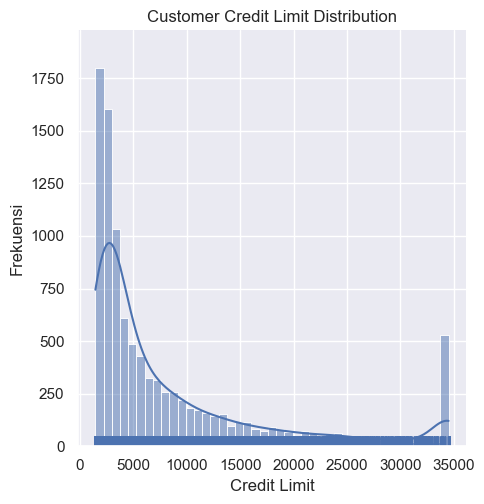

Skewness: 1.666725807993647
Kurtosis: 1.8089893357093434


In [22]:
sns.set(style="darkgrid")
sns.displot(data=df['Credit_Limit'], kde=True, rug=True)
plt.xlabel('Credit Limit')
plt.ylabel('Frekuensi')
plt.title('Customer Credit Limit Distribution')
plt.show()

print(f"Skewness: {df['Credit_Limit'].skew()}")
print(f"Kurtosis: {df['Credit_Limit'].kurtosis()}")


When examining the descriptive statistics of customer credit limits, it appears that the average credit limit is $8,000. However, upon observing the graph, due to the presence of an outlier, the median value represents the data distribution better, which is around $4,500. Furthermore, considering the skewness and kurtosis, it's evident that the data distribution of customer credit limits contains many outliers. Although the majority of customers have credit limits averaging below $5,000, there are numerous customers with significantly higher credit limits.

This observation aligns with the fact that there are relatively few customers with incomes above $120,000, and among them, only a fraction have high credit limits. Therefore, it can be concluded that the average credit limit is low, suggesting that customers with lower credit limits may be more likely to discontinue their services. Hence, there's an urgency for service improvement.

In [14]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Age_Group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,11914.0,1144,42,40-49
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,7392.0,1291,33,40-49
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,3418.0,1887,20,50-59
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,796.0,1171,20,40-49
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,4716.0,816,28,40-49


In [15]:
###Is there a significant difference in churn rates between card types?
###H0 (Null Hypothesis): There is no significant difference in the average Credit Limit between credit card types (Blue, Gold, Silver, Platinum).
###H1 (Alternative Hypothesis): There is a significant difference in the average Credit Limit between at least one type of credit card.

blue = df['Credit_Limit'][(df['Card_Category'] == 'Blue')]
gold = df['Credit_Limit'][(df['Card_Category'] == 'Gold')]
silver = df['Credit_Limit'][(df['Card_Category'] == 'Silver')]
platinum = df['Credit_Limit'][(df['Card_Category'] == 'Platinum')]

res = stats.f_oneway(blue, gold, silver, platinum)

print('P-value:', res.pvalue)
                           

P-value: 0.0



The Anova test was conducted to examine significant differences between the means of credit limits across different types of credit cards. The null hypothesis states that there are no significant differences in the mean credit limits among the types of credit cards, while the alternative hypothesis suggests that there are significant differences in the mean credit limits among at least two types of credit cards.

The obtained P-value is zero and less than 0.05, indicating that we can reject the null hypothesis and accept the alternative hypothesis, which suggests that there are significant differences in the mean credit limits among different types of credit cards.

### CONCLUSION

The demographic analysis of credit card service customers reveals that the majority fall within the age range of 40 to 49 years old, with females being the predominant gender. The most common education level among customers is a bachelor's degree, and the majority are married. Plotting the income distribution shows nothing unusual, with incomes generally spread out for the working age group, minimal for those not working, and also minimal for retirees or those estimated to be above 60 years old.

Based on the analysis of factors influencing churn rates among credit card service customers, it can be concluded that customers aged 30 to 60 years old, female, with a bachelor's degree, and married tend to discontinue their services, as seen from the churn rates in the data visualization to address the third problem statement. Additionally, examining the number of transactions conducted by customers reveals that those aged 60 to 79 years old, still pursuing a bachelor's or doctoral degree, are likely to discontinue their services in the following period. Similarly, married customers tend to discontinue their services.

To prevent or reduce churn rates, personalized and relevant retention programs can be developed. For example, a loyalty program could be implemented specifically targeting customer segments prone to discontinuing services, such as customers aged 60 to 79 who are still pursuing a bachelor's or doctoral degree and are married. Offering discounts or additional benefits tailored to these demographic groups could enhance their satisfaction. It's also important to maintain focused communication with these customer segments. Besides, adjusting service offerings to cater to these groups is crucial. Lastly, continuous monitoring of these demographic groups and data for further analysis in subsequent periods is necessary.